In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Daten importieren
fashion_mnist =keras.datasets.fashion_mnist

((train_images1,train_labels1),(test_images1,test_labels1))=fashion_mnist.load_data()

In [31]:
class_names=['T.shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
train_images1.shape,train_labels1.shape
combined = list(zip(train_images1,train_labels1))
np.random.shuffle(combined)
x,y = zip(*combined)
train_images=np.array(x)
train_labels=np.array(y)
combined = list(zip(test_images1,test_labels1))
np.random.shuffle(combined)
x,y = zip(*combined)
test_images=np.array(x)
test_labels=np.array(y)

In [32]:
train_images.shape,train_labels.shape

((60000, 28, 28), (60000,))

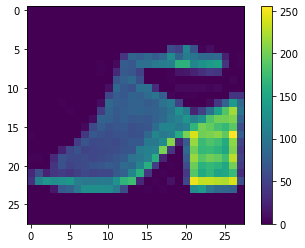

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [34]:
train_images=train_images/255.0
test_images=test_images/255.0

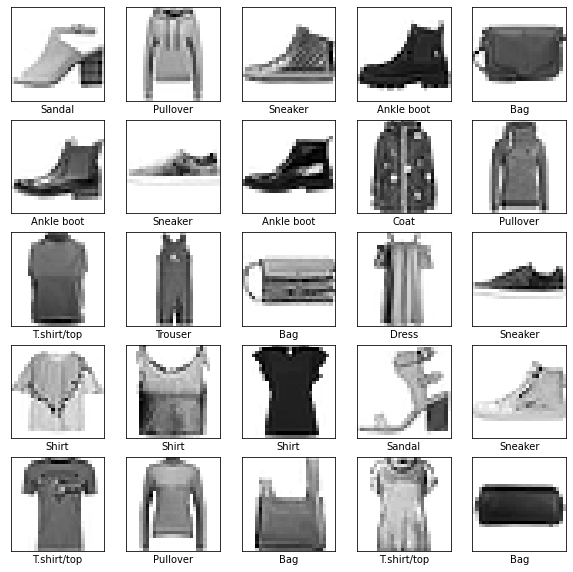

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [22]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [24]:
print(train_images.shape)
model.fit(train_images,train_labels,epochs=5)

(60000, 28, 28)
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1860 - accuracy: 0.9299
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1814 - accuracy: 0.9306
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1742 - accuracy: 0.9342
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1703 - accuracy: 0.9352
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1660 - accuracy: 0.9370


In [25]:
test_loss,test_acc= model.evaluate(test_images,test_labels,verbose=2)
print("Test accuracy:",test_acc)

313/313 - 0s - loss: 0.3677 - accuracy: 0.8912
Test accuracy: 0.8912000060081482


In [26]:
predictions=model.predict(test_images)

In [27]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img =predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color="blue"
    else:
        color="red"
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)          
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label =predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")
    

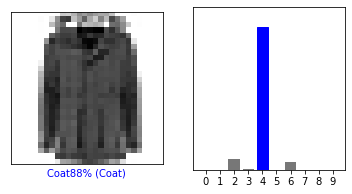

In [28]:
i=100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

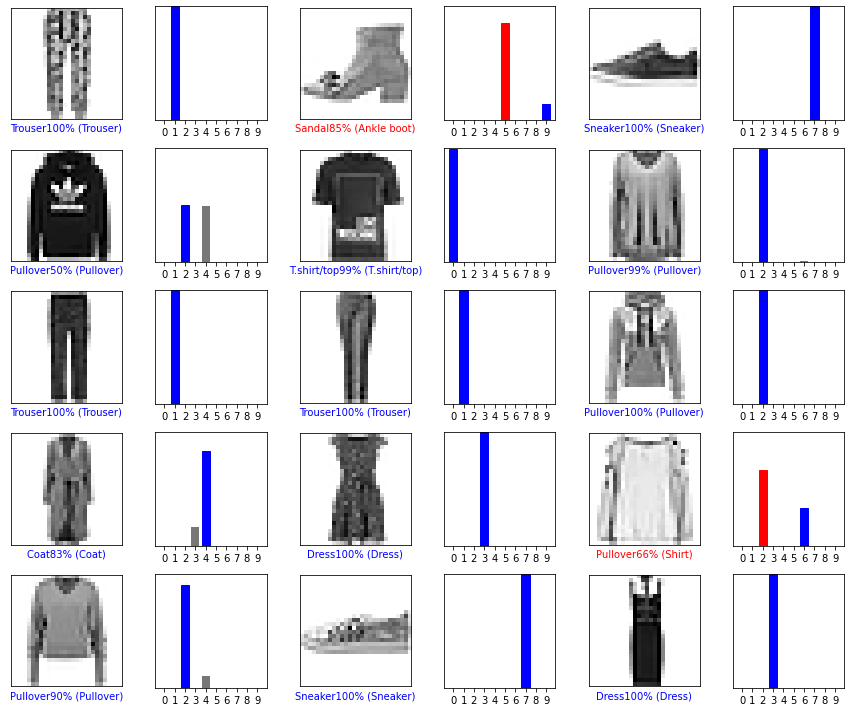

In [29]:
num_rows=5
num_cols=3
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()
    

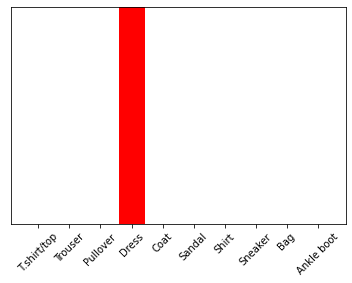

In [101]:
img=test_images[100]
img=(np.expand_dims(img,0))
predictions_single=model.predict(img)
plot_value_array(1,predictions_single[0],test_labels)
np.argmax(predictions_single[0])
_ = plt.xticks(range(10),class_names,rotation=45)

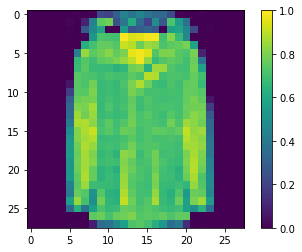

Coat


In [30]:
plt.figure()
plt.imshow(test_images[100])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[test_labels[100]])